In [4]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
from torchvision import datasets,transforms
import torch.nn.functional as F
import sys
sys.path.append("../code/")
from dataloader import APPLIANCE_ORDER, get_train_test
from sklearn.metrics import mean_absolute_error
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../code/')
%matplotlib inline
import itertools
from pathlib import Path

In [108]:
tensor = np.load("../2015-5appliances.numpy.npy")


In [297]:
hvac = tensor[:, 1].copy()
hvac = hvac[hvac>10]

In [299]:
sorted_hvac = np.sort(np.array(hvac))
print(len(sorted_hvac))
print(sorted_hvac[14996])

149962
231.316665649


In [300]:
fridge = tensor[:, 2].copy()
fridge = fridge[fridge>10]

In [303]:
sorted_fridge = np.sort(np.array(fridge))
print(len(sorted_fridge))
print(sorted_fridge[18031])

180313
45.7999992371


In [289]:
dr = tensor[:, 5].copy()
dr = dr[dr>10]

In [291]:
sorted_dr = np.sort(np.array(dr))
print(len(sorted_dr))
print(sorted_dr[2072])

20725
15.5


In [292]:
app = tensor[:, 1]

In [293]:
np.histogram(app[app<100].reshape(1, -1)[0], bins=20)

(array([32104,   714,   180,   157,   137,   134,   140,   902,   112,
          112,   287,   193,   263,   230,   144,   144,   144,   210,
          230,   270]),
 array([  0.        ,   4.99916649,   9.99833298,  14.99749947,
         19.99666595,  24.99583244,  29.99499893,  34.99416542,
         39.99333191,  44.9924984 ,  49.99166489,  54.99083138,
         59.98999786,  64.98916435,  69.98833084,  74.98749733,
         79.98666382,  84.98583031,  89.9849968 ,  94.98416328,  99.98332977]))

Text(0.5,1,'hvac >10')

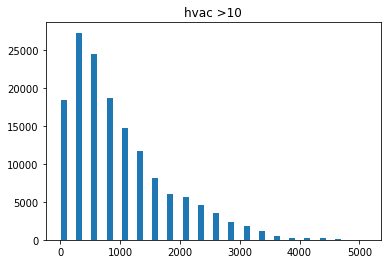

In [296]:
plt.hist(app[app>10].reshape(1, -1)[0], bins=20, width=100)
plt.title("hvac >10")

In [40]:
print(dr.max())
bins = np.arange(0, 4500, 200)
hist, bin_edges = np.histogram(dr.reshape(1, -1)[0], bins=bins)

4364.11669922


In [109]:
dr_home = dr[i].reshape(-1, 1)[0]
dr_home = dr_home[dr_home>0]
dr_home

array([ 0.30000001])

In [124]:
dr.max(axis=1).max(axis=1).min()*0.05

75.135833740234375

In [139]:
tensor[:, 2].

0.0

In [135]:
for i, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, i+1].copy()
    print(i, app.max(axis=1).max(axis=1).mean()* 0.05)

0 136.5926835
1 12.5596813202
2 149.887168705
3 33.5576224952
4 15.7314337787


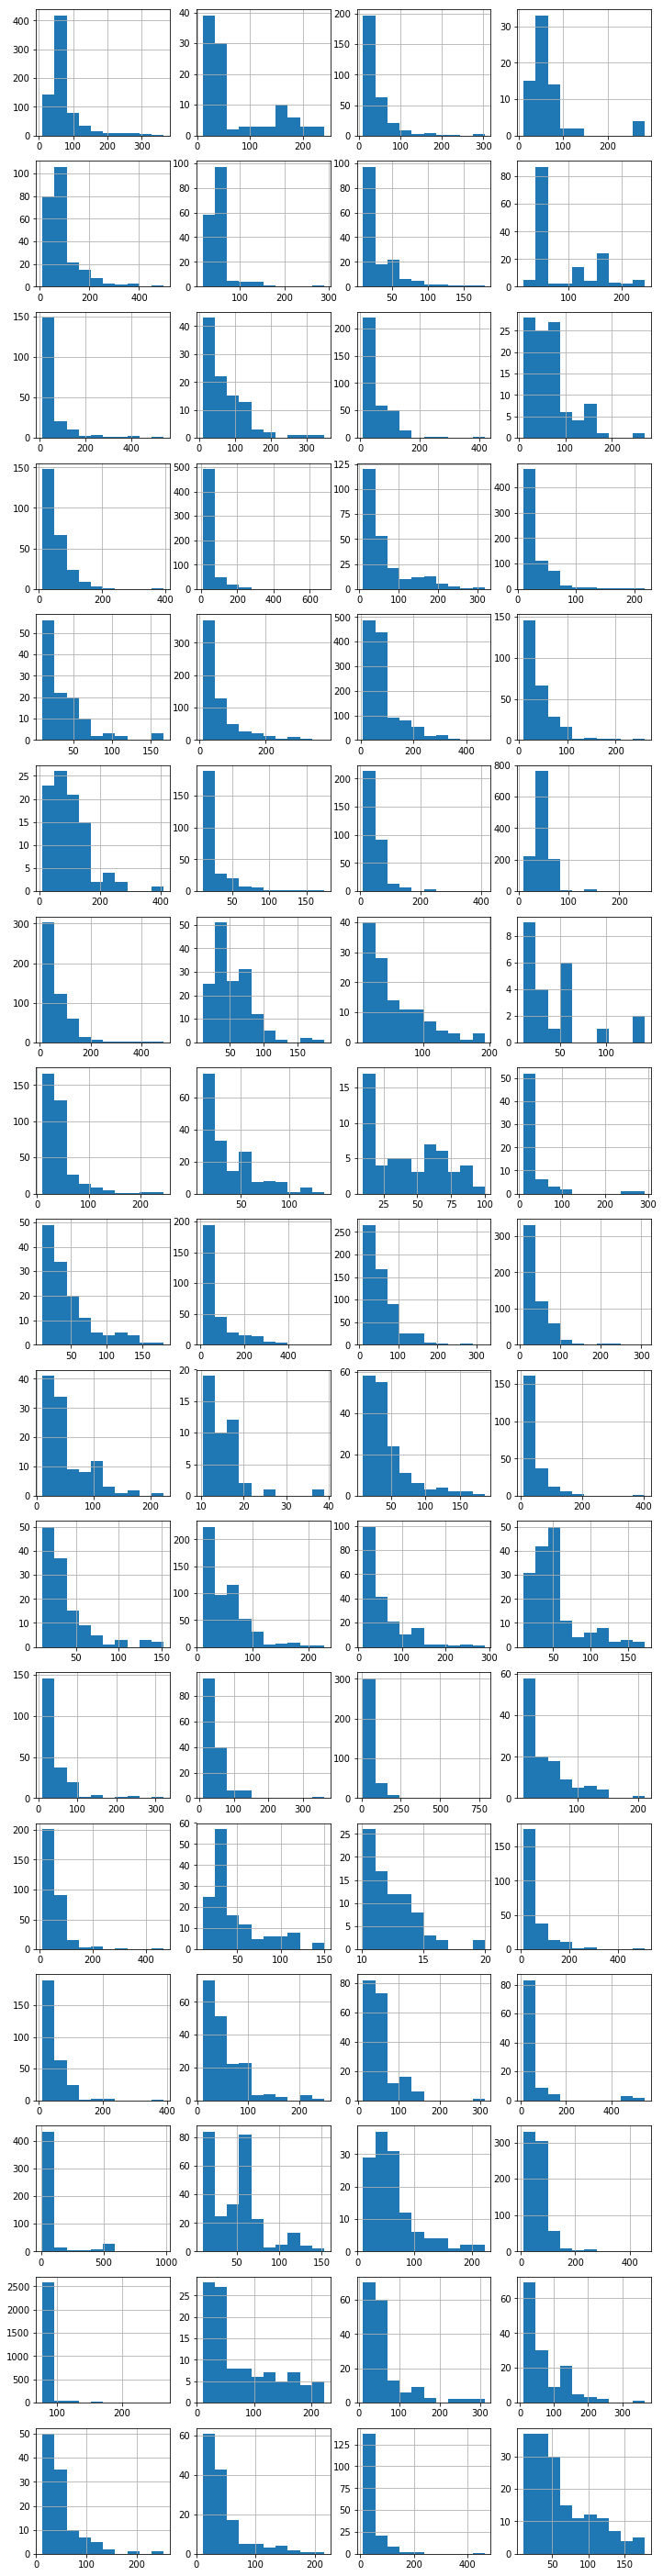

In [283]:
dr = tensor[:, 5]
fig, axes = plt.subplots(ncols=4, nrows = 17, figsize=(12, 51))
ax = axes.flatten()

for i in range(68):
    dr_home = dr[i].reshape(1, -1)[0]
    dr_home = dr_home[dr_home>10]
    pd.Series(dr_home).hist(ax=ax[i])


In [96]:
dr_on = dr[dr>10]
dr_100 = dr_on[dr_on<100]
dr_l_100 = dr_on[dr_on>500]

In [97]:
dr_l_100.mean()

1465.0552671641569

(array([ 1894.,  1697.,  1448.,  1156.,   767.,   393.,   204.,   107.,
           42.,    19.]),
 array([  500.08334351,   886.48667908,  1272.89001465,  1659.29335022,
         2045.69668579,  2432.10002136,  2818.50335693,  3204.9066925 ,
         3591.31002808,  3977.71336365,  4364.11669922]),
 <a list of 10 Patch objects>)

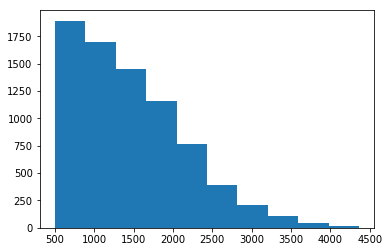

In [98]:
plt.hist(dr_l_100.reshape(1, -1)[0])

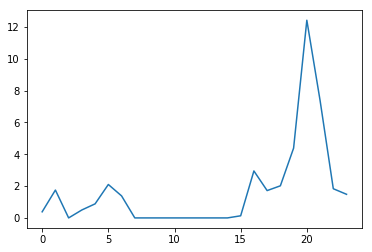

In [82]:
pd.Series(dr[0][110]).plot()

(array([  1.74699000e+05,   2.18000000e+03,   1.91800000e+03,
          1.58800000e+03,   1.20900000e+03,   6.58000000e+02,
          2.87000000e+02,   1.65000000e+02,   5.80000000e+01,
          2.20000000e+01]),
 array([    0.        ,   436.41166992,   872.82333984,  1309.23500977,
         1745.64667969,  2182.05834961,  2618.47001953,  3054.88168945,
         3491.29335937,  3927.7050293 ,  4364.11669922]),
 <a list of 10 Patch objects>)

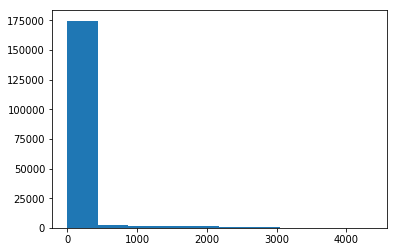

In [3]:
# for dryer
plt.hist(dr.reshape(1, -1)[0])

In [53]:
dw = tensor[:, 4]
dw[dw>0].mean()

117.04597207156934

In [57]:
hvac = tensor[:, 1]
fridge = tensor[: ,2]

In [62]:
hvac.max(axis=1).max(axis=1).mean()*0.1

273.18536700080421

In [63]:
fridge.max(axis=1).max(axis=1).mean()*0.1

25.11936264038086

In [64]:
dr.max(axis=1).max(axis=1).mean()*0.1

299.77433740952438

In [48]:
dw.max(axis=1).max(axis=1).mean()*0.1

NameError: name 'dw' is not defined

In [66]:
mw.max(axis=1).max(axis=1).mean()*0.1

31.462867557301241

In [83]:
on_threshold = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, idx+1, :, :]
    on_threshold[appliance] = app.max(axis=1).max(axis=1).mean()*0.14

In [84]:
on_threshold

{'dr': 419.68407237333417,
 'dw': 93.96134298657671,
 'fridge': 35.167107696533208,
 'hvac': 382.45951380112592,
 'mw': 44.048014580221739}

In [55]:
mw = tensor[:, -1]
pd.Series(mw[0][0])

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7     54.966667
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14    10.333333
15     0.000000
16     7.666667
17    22.316668
18    97.783333
19     0.200000
20     0.000000
21     0.100000
22     0.000000
23     0.000000
dtype: float64

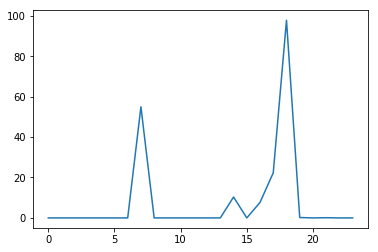

In [43]:
pd.Series(mw[0][0]).plot()

(array([  1.75940000e+05,   1.31700000e+03,   1.18500000e+03,
          1.47000000e+03,   1.10500000e+03,   7.48000000e+02,
          4.66000000e+02,   3.31000000e+02,   2.07000000e+02,
          1.50000000e+01]),
 array([    0.        ,   102.1666687 ,   204.3333374 ,   306.5000061 ,
          408.6666748 ,   510.83334351,   613.00001221,   715.16668091,
          817.33334961,   919.50001831,  1021.66668701]),
 <a list of 10 Patch objects>)

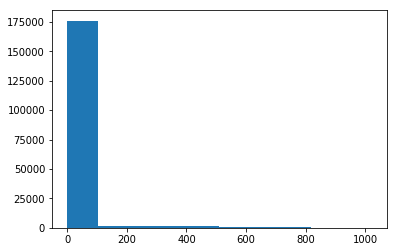

In [10]:
# for dw
dw = tensor[:, 4]
plt.hist(dw.reshape(1, -1)[0])

(array([  1.80444000e+05,   1.85600000e+03,   3.36000000e+02,
          7.60000000e+01,   2.80000000e+01,   3.30000000e+01,
          5.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          1.00000000e+00]),
 array([   0.        ,   98.05666504,  196.11333008,  294.16999512,
         392.22666016,  490.2833252 ,  588.33999023,  686.39665527,
         784.45332031,  882.50998535,  980.56665039]),
 <a list of 10 Patch objects>)

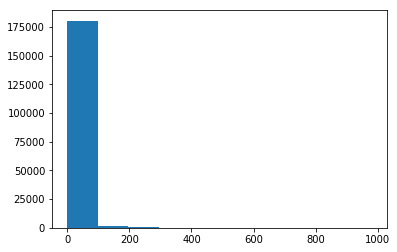

In [11]:
# for mw
mw = tensor[:, 5]
plt.hist(mw.reshape(1, -1)[0])

In [313]:
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    print(idx, appliance)
    app = tensor[:, idx+1].copy()
    print(app.max(axis=1).max(axis=1).mean()/6)

0 hvac
198.569437663
1 fridge
28.5611114502
2 dr
250.452779134
3 dw
0.17777778705
4 mw
3.32500012716
